In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_index=pd.read_csv('Economics.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Economics.csv'

In [ ]:
df_index.head()


,sr_no,year,month,interest_rate,unemployment_rate,index_price
0,1,2012,7,2.35,11.02,3142.75
1,2,2024,3,6.47,6.58,2733.12
2,3,2017,10,8.92,7.84,5376.28
3,4,2006,1,1.77,9.70,1523.04
4,5,2019,5,9.81,8.92,2610.88


In [ ]:
#drop unnecessary columns
df_index.drop(columns=["sr_no",'year','month'],axis=1,inplace=True)

In [ ]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.35,11.02,3142.75
1,6.47,6.58,2733.12
2,8.92,7.84,5376.28
3,1.77,9.70,1523.04
4,9.81,8.92,2610.88


In [ ]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

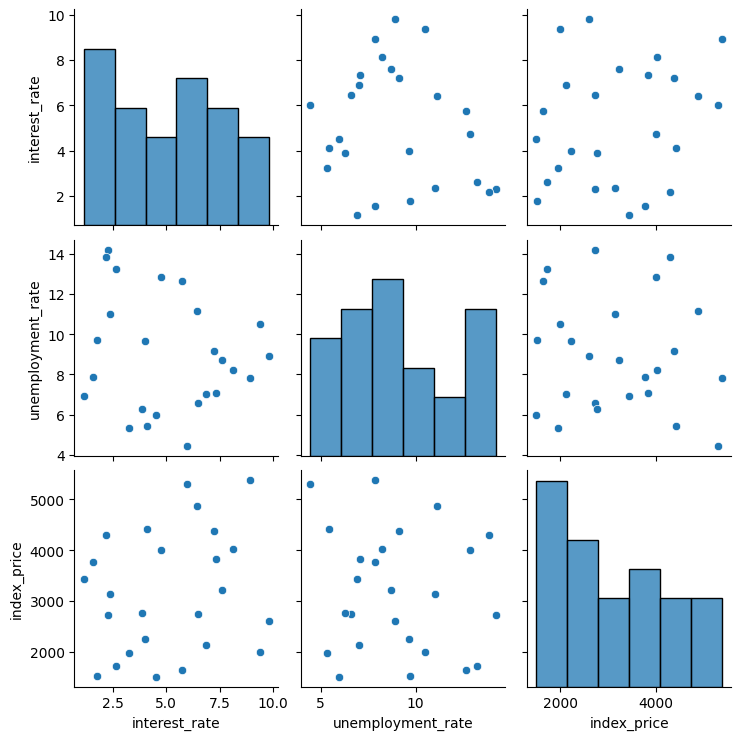

In [ ]:
## Lets do some visuallization
import seaborn as sns
sns.pairplot(df_index)


In [ ]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.183375,0.203976
unemployment_rate,-0.183375,1.000000,-0.139530
index_price,0.203976,-0.139530,1.000000


Text(0, 0.5, 'unemployment rate')

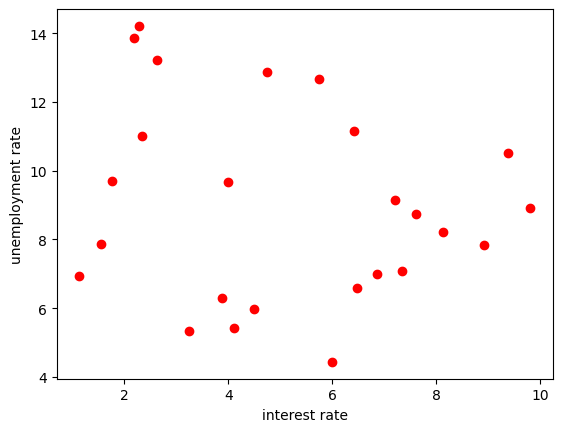

In [ ]:
## Visualiz the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('interest rate')
plt.ylabel('unemployment rate')

In [ ]:
##independent and dependent features
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [ ]:
X.head(),y

(   interest_rate  unemployment_rate
 0           2.35              11.02
 1           6.47               6.58
 2           8.92               7.84
 3           1.77               9.70
 4           9.81               8.92,
 0     3142.75
 1     2733.12
 2     5376.28
 3     1523.04
 4     2610.88
 5     1965.42
 6     4003.55
 7     4379.69
 8     1719.83
 9     5298.46
 10    2129.77
 11    3437.05
 12    4018.23
 13    1503.11
 14    2237.44
 15    3832.50
 16    2719.44
 17    1994.56
 18    1632.09
 19    4875.73
 20    3774.39
 21    4420.92
 22    2765.71
 23    3221.46
 24    4287.19
 Name: index_price, dtype: float64)

In [ ]:
y


0     3142.75
1     2733.12
2     5376.28
3     1523.04
4     2610.88
5     1965.42
6     4003.55
7     4379.69
8     1719.83
9     5298.46
10    2129.77
11    3437.05
12    4018.23
13    1503.11
14    2237.44
15    3832.50
16    2719.44
17    1994.56
18    1632.09
19    4875.73
20    3774.39
21    4420.92
22    2765.71
23    3221.46
24    4287.19
Name: index_price, dtype: float64

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)


In [ ]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

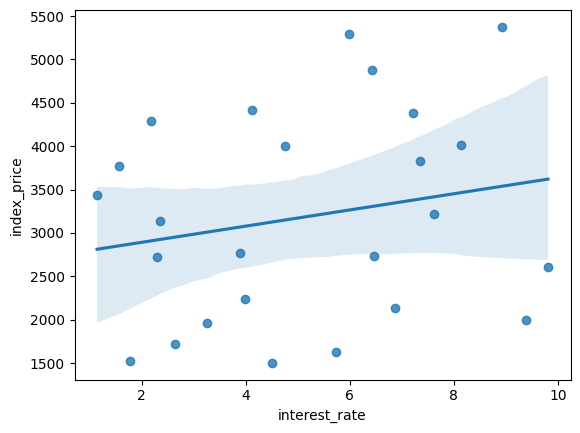

In [ ]:

sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[-1.25630179,  1.77805797],
       [ 1.02733104, -0.10762468],
       [-0.49509085,  0.23489189],
       [ 0.54789431, -0.89946408],
       [ 0.71611772, -0.7410962 ],
       [-0.280606  , -1.12044252],
       [-1.06705045,  1.54603062],
       [-0.17546637,  1.41344355],
       [ 0.24088658,  1.33978407],
       [ 1.95255981, -0.03764818],
       [ 0.34602621, -1.6876205 ],
       [ 0.85910762,  0.04706022],
       [-1.51704808, -0.42067747],
       [-1.42873079,  0.24962379],
       [-1.18480684,  0.73577635],
       [-0.44462383, -1.31932311],
       [ 0.91378023, -0.71899836],
       [ 1.24602147, -0.29177338]])

In [ ]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [ ]:
regression.fit(X_train,y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
## cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)


In [ ]:
np.mean(validation_score)

np.float64(-1336.1292897676374)

In [ ]:
## prediction
y_pred=regression.predict(X_test)

In [ ]:
X_test

array([[-0.80630416, -1.35615285],
       [ 1.57826271, -0.43540936],
       [ 0.52686638,  0.78365501],
       [-1.21004035,  1.91064504],
       [-1.69368267, -0.76687702],
       [-0.54135229, -1.00627032],
       [ 1.77171964,  0.54794468]])

In [ ]:
## Performance metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

1636033.187551663
1064.3183321572828
1279.0751297526126


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
# display ajusted r2 score
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

-0.04871305607622589
-0.573069584114339


## Assumptions


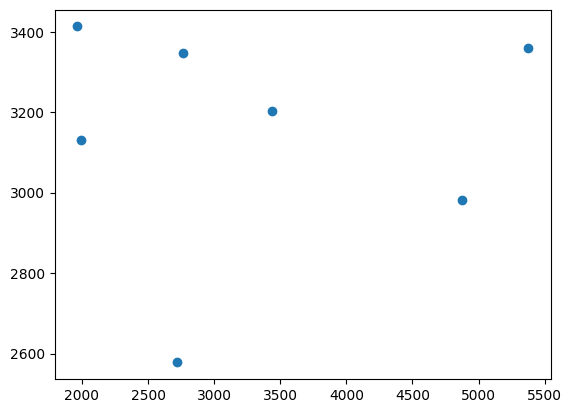

In [ ]:
plt.scatter(y_test,y_pred)


In [ ]:
residuals=y_test-y_pred
print(residuals)

5    -1447.652342
2     2017.009622
19    1893.616758
16     141.600340
11     233.849988
22    -580.309522
17   -1136.189753
Name: index_price, dtype: float64


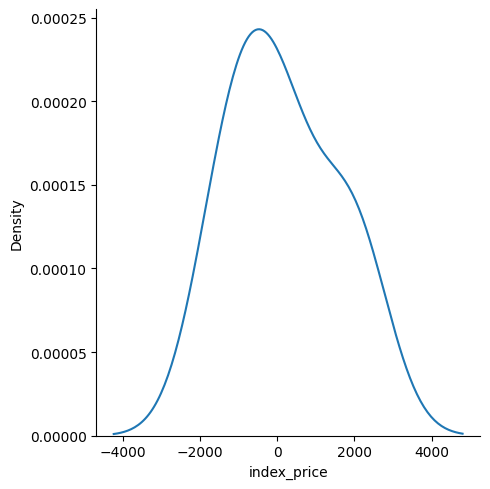

In [ ]:
## pLOT this residuals
sns.displot(residuals,kind='kde')

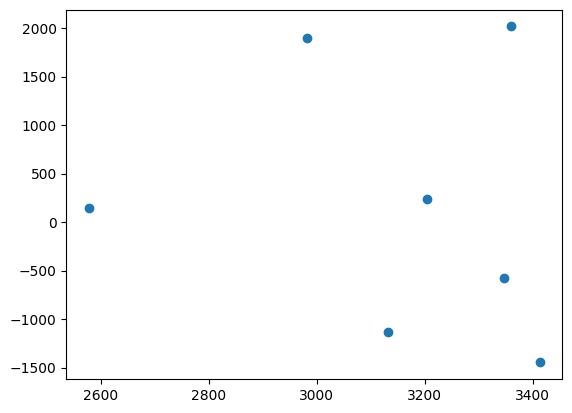

In [ ]:
## scatter plot with respct to prediciton and residuals
plt.scatter(y_pred,residuals)


In [ ]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):             -0.117
Method:                 Least Squares   F-statistic:                            0.05702
Date:                Sun, 07 Sep 2025   Prob (F-statistic):                       0.945
Time:                        09:31:16   Log-Likelihood:                         -171.51
No. Observations:                  18   AIC:                                      347.0
Df Residuals:                      16   BIC:                                      348.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            72.6907    889.422      0.082      0.936   -1812.799    1958.181
x2          -246.6895    889.422     -0.277      0.785   -2132.180    1638.801
==============================================================================
Omnibus:                        3.488   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.271
Skew:                          -0.013   Prob(JB):                        0.530
Kurtosis:                       1.699   Cond. No.                         1.45
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print(regression.coef_)

[  72.69068916 -246.68952553]
